In [1]:
#bring the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import a csv file containing grain size data
df = pd.read_csv(r'C:\Users\iamma\Documents\Teaching\Earth_333\Labs\2023\A1.csv') #Specify the path to a *.csv file

In [3]:
#The file should contain columns for mm, phi, phi_mid, wt_freq, and cumul_wt_freq
df.head(11)  

,mm,phi,phi_mid,wt_of_sample,wt_freq,cumul_wt_freq
0,2,-1.0,-1.50,0.000,0.0000,0.000
1,1,0.0,-0.50,0.000,0.0000,0.000
2,0.71,0.5,0.25,0.028,0.0150,0.016
3,0.5,1.0,0.75,0.055,0.0290,0.045
4,0.355,1.5,1.25,0.016,0.0080,0.053
5,0.25,2.0,1.75,3.927,2.0660,2.119
6,0.18,2.5,2.25,65.375,34.3890,36.508
7,0.125,3.0,2.75,110.266,58.0030,94.511
8,0.09,3.5,3.25,10.257,5.3950,99.907
9,0.063,4.0,3.75,0.151,0.0794,99.986


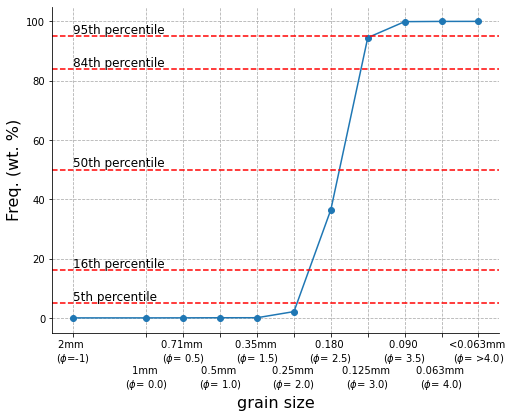

[[-1.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00]
 [ 5.0000e-01  1.6000e-02]
 [ 1.0000e+00  4.5000e-02]
 [ 1.5000e+00  5.3000e-02]
 [ 2.0000e+00  2.1190e+00]
 [ 2.5000e+00  3.6508e+01]
 [ 3.0000e+00  9.4511e+01]
 [ 3.5000e+00  9.9907e+01]
 [ 4.0000e+00  9.9986e+01]
 [ 4.5000e+00  1.0000e+02]]


In [4]:
#Make a cumulative freq. graph of grain size using phi values for the x axis

fig,ax = plt.subplots(figsize=(8, 6))

x=df['phi'].values
y=df['cumul_wt_freq'].values

# Hide the right and top lines of the default box
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#PLot the dots and line and assign ticks and labels
ax.plot(x,y, marker='o')

#Create an array of the points along the line for calculations below
line = plt.gca().lines[0].get_xydata()

xticks = [ -1.0, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5 ]
xlbls = ['2mm \n($\phi$=-1)','1mm \n($\phi$= 0.0)', '0.71mm \n($\phi$= 0.5)', '0.5mm \n($\phi$= 1.0)', '0.35mm \n($\phi$= 1.5)', 
'0.25mm \n($\phi$= 2.0)', '0.180 \n($\phi$= 2.5)', '0.125mm \n($\phi$= 3.0)', '0.090 \n($\phi$= 3.5)', '0.063mm \n($\phi$= 4.0)', '<0.063mm \n($\phi$= >4.0)' ]
ax.set_xticks(xticks)
ax.set_xticklabels( xlbls )

# vertical alignment of xtick labels
va = [ 0, -.08, 0, -.08, 0, -.08, 0, -.08, 0, -0.08 ]
for t, y in zip( ax.get_xticklabels( ), va ):
    t.set_y( y )

ax.set_xlabel('grain size', fontsize=16)
ax.set_ylabel('Freq. (wt. %)', fontsize=16) #r'$\alpha > \beta$'

#horizontal lines to visualize y values at different percentiles (5, 16, 50, 84, and 95)
plt.axhline(y = 5, color = 'r', linestyle = 'dashed')
plt.axhline(y = 16, color = 'r', linestyle = 'dashed')
plt.axhline(y = 50, color = 'r', linestyle = 'dashed')
plt.axhline(y = 84, color = 'r', linestyle = 'dashed')
plt.axhline(y = 95, color = 'r', linestyle = 'dashed')

#adding text inside the plot
plt.text(-1, 6, '5th percentile', fontsize = 12)
plt.text(-1, 17, '16th percentile', fontsize = 12)
plt.text(-1, 51, '50th percentile', fontsize = 12)
plt.text(-1, 85, '84th percentile', fontsize = 12)
plt.text(-1, 96, '95th percentile', fontsize = 12)

#Add the grid lines and show the plot
ax.grid(True, linestyle='--')
plt.show()
print(line)

#fig.savefig('cumFq.svg', bbox_inches = 'tight', format='svg')

In [5]:
#Extract the phi values at given cumul. freq. for calculations
x=line[0:,0]
y=line[0:,1]
Phi_5p = np.interp(5, y, x).round(2)
Phi_16p = np.interp(16, y, x).round(2)
Phi_50p = np.interp(50, y, x).round(2)
Phi_84p = np.interp(84, y, x).round(2)
Phi_95p = np.interp(95, y, x).round(2)
print(Phi_5p)
print(Phi_16p)
print(Phi_50p)
print(Phi_84p)
print(Phi_95p)

2.04
2.2
2.62
2.91
3.05


In [6]:
#Skewness based on the linear interpolation above

Skn=((Phi_84p+Phi_16p-(2*Phi_50p))/(2*(Phi_84p-Phi_16p)))+((Phi_95p+Phi_5p-(2*Phi_50p))/(2*(Phi_95p-Phi_5p)))


print(Skn.round(2))

-0.17


In [7]:
#Verbal Skewness
if Skn >0.3:
    print("Strongly fine-skewed")
elif Skn >=0.1:
    print("Fine skewed")
elif Skn >=-0.1:
    print("Near symmetrical")
elif Skn >=-0.3:
    print("Coarse skewed")
else:
    print("Strongly coarse skewed")
        

Coarse skewed


In [8]:
#Mean

Mz=(Phi_16p+Phi_50p+Phi_84p)/3
print(Mz.round(2))

2.58


In [9]:
#standard deviation

SD=((Phi_84p-Phi_16p)/4)+((Phi_95p-Phi_5p)/6.6)
print(SD.round(2))

0.33


In [10]:
#Verbal SD
if SD >4.00:
    print("extremely poorly sorted")
elif SD >=2.0:
    print("very poorly sorted")
elif SD >=1.00:
    print("poorly sorted")
elif SD >=0.71:
    print("moderately sorted")
elif SD >=0.50:
    print("moderately well sorted")
elif SD >=0.35:
    print("well sorted")
else:
    print("very well sorted")

very well sorted


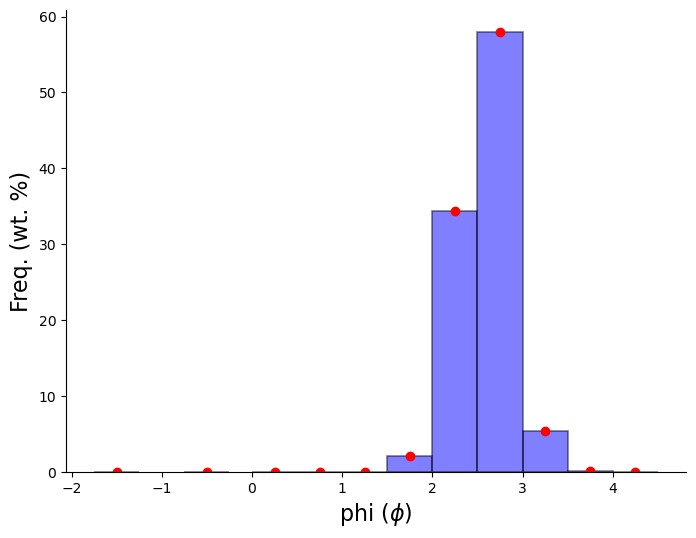

In [11]:
#to get the default black frame
plt.style.use('default') 
fig,ax = plt.subplots(figsize=(8,6))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
x_mid=df['phi_mid'].values


#Make the bar plot
ax.bar(x_mid, df['wt_freq'], color=('b'),  alpha=0.5, edgecolor='black', linewidth=1.2, width=0.5)   #alpha is for transparency
ax.set_xlabel(r'phi ($\phi$)', fontsize=16)
ax.set_ylabel('Freq. (wt. %)', fontsize=16)

#Add the points
ax.scatter(x_mid, df['wt_freq'], c='red', marker='o')


plt.show()
